https://github.com/AlexanderCher13/git_practicum

# Проект по разработке модели машинного обучения, предсказывающей  вероятность снижения покупательской активности.
Данный проект проводится по заказу интернет-магазина "В один клик". Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Возможное решение — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений. Необходимо разработать модель машинного обучения, которая позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.
 
Проект включает в себя:
 - Изучение исходных данных;
 - Предобработку данных;
 - Исследовательский анализ данных;
 - Объединение данных;
 - Корреляционный анализ;
 - Использование пайплайнов;
 - Анализ важности признаков;
 - Сегментация покупателей;
 - Общий вывод.

In [1]:
!pip install --upgrade scikit-learn

In [2]:
!pip install shap

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.impute import SimpleImputer
import shap
import warnings
warnings.filterwarnings('ignore')

## Загрузка данных

In [4]:
def check_df(df):
    """
    Функция показывает 5 первых строк,
    выдает инофрмацию о датасете,
    показывает наличие пропусков и дубликатов
    """
    display(df.head())
    display(df.info())
    display(df.isna().sum())
    display(df.duplicated().sum())

In [5]:
market_file = pd.read_csv('/datasets/market_file.csv')

In [6]:
check_df(market_file)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

0

In [7]:
market_money = pd.read_csv('/datasets/market_money.csv')

In [8]:
check_df(market_money)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

id         0
Период     0
Выручка    0
dtype: int64

0

In [9]:
market_time = pd.read_csv('/datasets/market_time.csv')

In [10]:
check_df(market_time)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

id        0
Период    0
минут     0
dtype: int64

0

In [11]:
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

In [12]:
check_df(money)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

id         0
Прибыль    0
dtype: int64

0

###### Вывод по загрузке данных: 
 - в данных отсутствуют пропуски;
 - на первый взгляд в данных отсутствуют дубликаты;
 - в датасетах данные нужного типа.
 
Рассмотрим данные повнимательнее.

## Предобработка данных

Приведем названия столбцов в данных к общему виду. Также переименуем столбцы с одинаковыми названиями, чтобы различать их в дальнейшем.

In [13]:
market_file.columns = ['id','покупательская_активность', 'тип_сервиса', 
                       'разрешить_сообщать', 'маркет_актив_6_мес', 'маркет_актив_тек_мес',
                       'длительность', 'акционные_покупки', 'популярная_категория',
                       'средний_просмотр_категорий_за_визит',
                       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
                       'страниц_за_визит']

In [14]:
market_money.columns = ['id', 'период_деньги', 'выручка']

In [15]:
market_time.columns = ['id', 'период_время', 'минут']

In [16]:
money.columns = ['id', 'прибыль']

Проверим наличие опечаток в данных.

In [17]:
market_file['покупательская_активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [18]:
market_file['тип_сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

Исправим опечатку.

In [19]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')

In [20]:
market_file['разрешить_сообщать'].unique()

array(['да', 'нет'], dtype=object)

In [21]:
market_file['популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

In [22]:
market_money['период_деньги'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [23]:
market_time['период_время'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

Исправим опечатку.

In [24]:
market_time['период_время'] = market_time['период_время'].replace('предыдцщий_месяц', 'предыдущий_месяц')

Взглянем на датасеты еще раз, так как после изменения значений могли образоваться дубликаты.

In [25]:
check_df(market_file)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

None

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

0

In [26]:
check_df(market_money)

,id,период_деньги,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3900 non-null   int64  
 1   период_деньги  3900 non-null   object 
 2   выручка        3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

id               0
период_деньги    0
выручка          0
dtype: int64

0

In [27]:
check_df(market_time)

,id,период_время,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2600 non-null   int64 
 1   период_время  2600 non-null   object
 2   минут         2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

id              0
период_время    0
минут           0
dtype: int64

0

In [28]:
check_df(money)

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

id         0
прибыль    0
dtype: int64

0

Дубликатов нет. Можно установить колонку 'id' в качестве индексов.

In [29]:
market_file = market_file.set_index('id')
market_money = market_money.set_index('id')
market_time = market_time.set_index('id')
money = money.set_index('id')

###### Вывод по предобработке данных: 
 - названия столбцов приведены к общему виду;
 - исправлены опечатки в данных.
 
Приступим к исследовательскому анализу данных.

## Исследовательский анализ данных

Для анализа данных нам необходимо отобрать клиентов с покупательской активностью не менее трёх месяцев. Для этого нам нужно изучить датасет money - если клиент покупал что-либо за этот период, то значение в датасете money должно быть больше нуля.

In [30]:
money.describe()

,прибыль
count,1300.000000
mean,3.996631
std,1.013722
min,0.860000
25%,3.300000
50%,4.045000
75%,4.670000
max,7.430000


Минимальное значение равняется 0.86, значит каждый клиент в датасете покупал что-либо за указанный период.

Построим графики и проведем статистический анализ для каждого признака.

In [31]:
def visual_hist_box(series, title, xlabel):
    """
    Функция получает на входе series,
    название гистограммы (str),
    название оси Х.
    Функция строит гистограмму и ящик с усами
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(series, bins=20)
    axes[0].set_title(title)
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel('Частота')

    axes[1].boxplot(series, patch_artist=True)
    axes[1].set_title('Ящик с усами')
    plt.show()

In [32]:
def visual_countplot(series, title, xlabel):
    sns.countplot(y=series)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Количество')
    plt.show()

In [33]:
market_file.describe()

,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


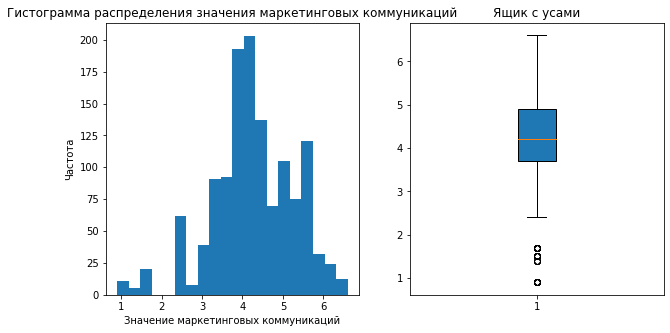

In [34]:
visual_hist_box(market_file['маркет_актив_6_мес'], 'Гистограмма распределения значения маркетинговых коммуникаций', 'Значение маркетинговых коммуникаций')

В столбце присутствуют выбросы.

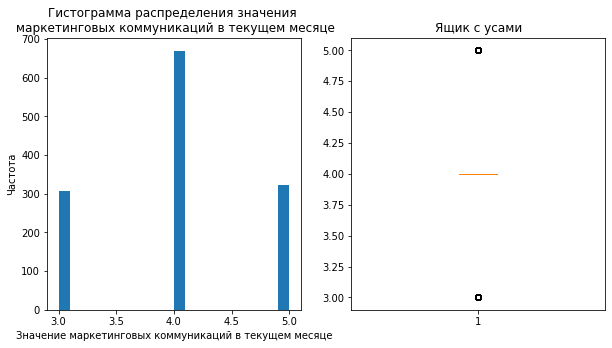

In [35]:
visual_hist_box(market_file['маркет_актив_тек_мес'], 'Гистограмма распределения значения \n маркетинговых коммуникаций в текущем месяце', 'Значение маркетинговых коммуникаций в текущем месяце')

Ящик с усами выглядит так из-за того, что в столбце всего три разных значения.

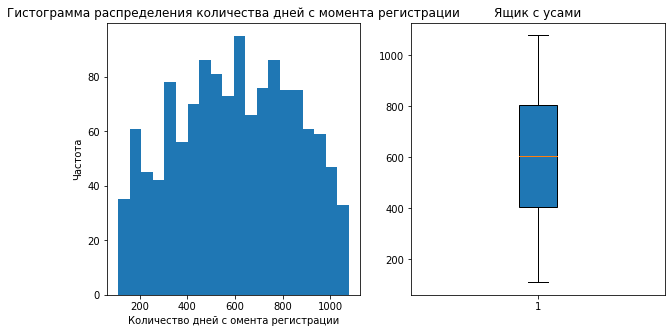

In [36]:
visual_hist_box(market_file['длительность'], 'Гистограмма распределения количества дней с момента регистрации', 'Количество дней с омента регистрации')

Выбросы отсутстсвуют. Распределение похоже на нормальное.

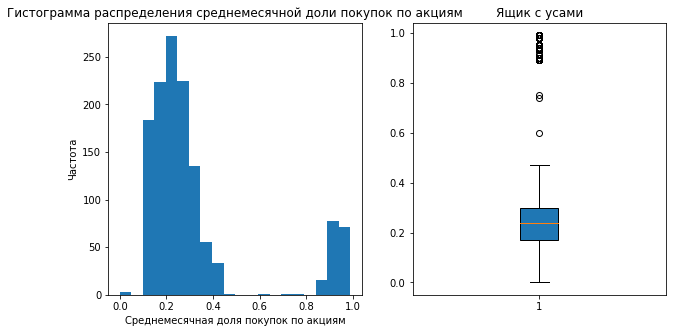

In [37]:
visual_hist_box(market_file['акционные_покупки'], 'Гистограмма распределения среднемесячной доли покупок по акциям', 'Среднемесячная доля покупок по акциям')

В столбце присутствуют выбросы.

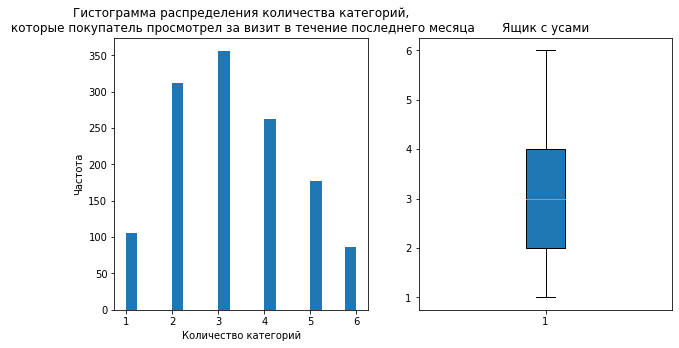

In [38]:
visual_hist_box(market_file['средний_просмотр_категорий_за_визит'], 'Гистограмма распределения количества категорий,\n которые покупатель просмотрел за визит в течение последнего месяца', 'Количество категорий')

Выбросы отсутствуют. Распределение нормальное.

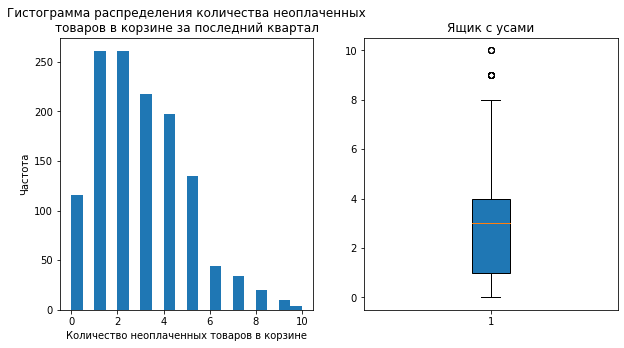

In [39]:
visual_hist_box(market_file['неоплаченные_продукты_штук_квартал'], 'Гистограмма распределения количества неоплаченных\nтоваров в корзине за последний квартал', 'Количество неоплаченных товаров в корзине')

В столбце присутствуют выбросы. Распределение нормальное.

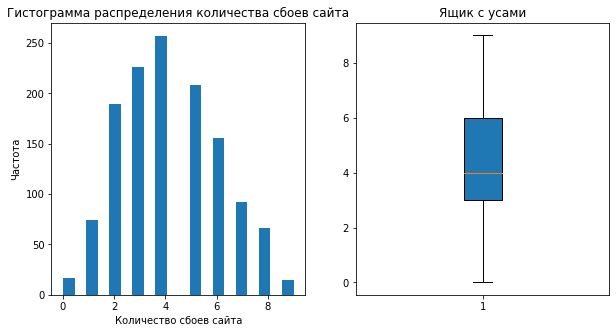

In [40]:
visual_hist_box(market_file['ошибка_сервиса'], 'Гистограмма распределения количества сбоев сайта', 'Количество сбоев сайта')

Выбросы отсутствуют. Распределение нормальное.

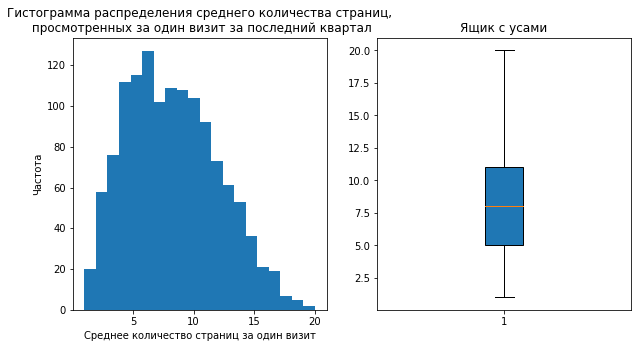

In [41]:
visual_hist_box(market_file['страниц_за_визит'], 'Гистограмма распределения среднего количества страниц,\n просмотренных за один визит за последний квартал', 'Среднее количество страниц за один визит')

Выбросы отсутствуют. Распределение похоже на нормальное.

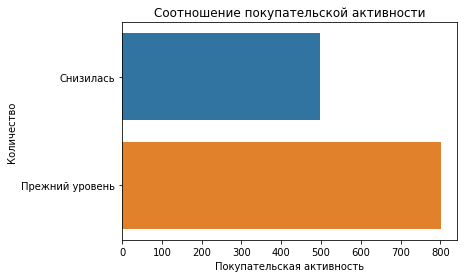

In [42]:
visual_countplot(market_file['покупательская_активность'], 'Соотношение покупательской активности', 'Покупательская активность')

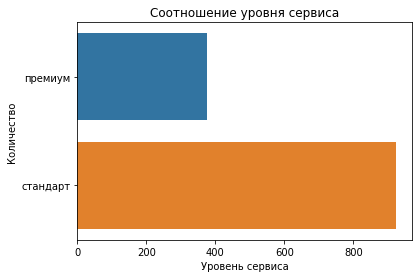

In [43]:
visual_countplot(market_file['тип_сервиса'], 'Соотношение уровня сервиса', 'Уровень сервиса')

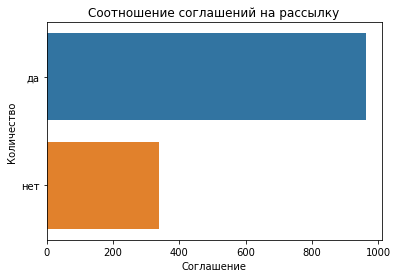

In [44]:
visual_countplot(market_file['разрешить_сообщать'], 'Соотношение соглашений на рассылку', 'Соглашение')

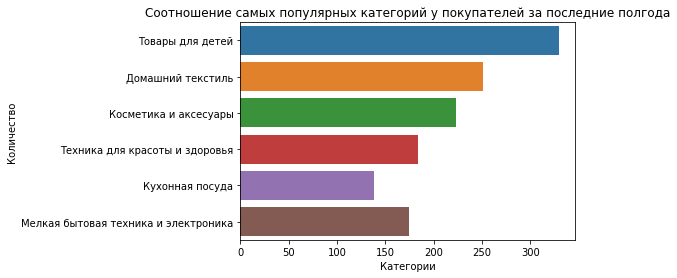

In [45]:
visual_countplot(market_file['популярная_категория'], 'Соотношение самых популярных категорий у покупателей за последние полгода', 'Категории')

В столбцах 'покупательская_активность', 'тип_сервиса' и 'разрешить_сообщать' наблюдается дисбаланс классов.

In [46]:
market_money.describe()

,выручка
count,3900.000000
mean,5025.696051
std,1777.704104
min,0.000000
25%,4590.150000
50%,4957.500000
75%,5363.000000
max,106862.200000


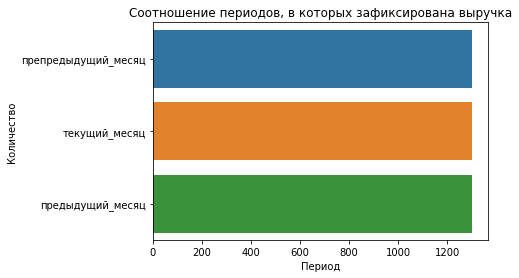

In [47]:
visual_countplot(market_money['период_деньги'], 'Соотношение периодов, в которых зафиксирована выручка', 'Период')

По каждому клиенту есть информация об активности за три периода.

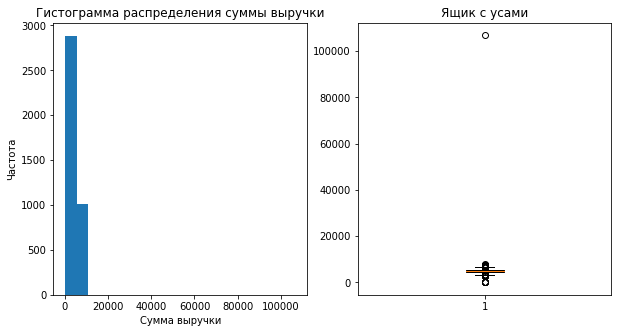

In [48]:
visual_hist_box(market_money['выручка'], 'Гистограмма распределения суммы выручки', 'Сумма выручки')

В столбце имеется выброс. Удалим его

In [49]:
market_money = market_money[market_money['выручка'] < 20000]

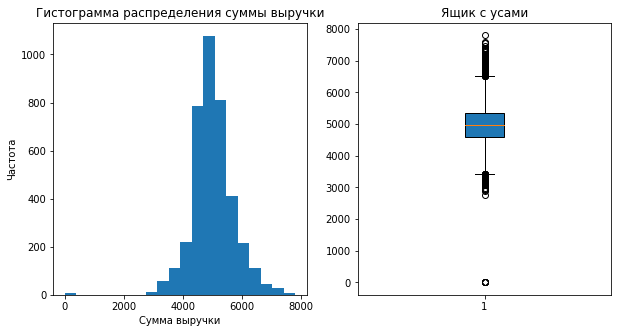

In [50]:
visual_hist_box(market_money['выручка'], 'Гистограмма распределения суммы выручки', 'Сумма выручки')

Удалим наблюдение с нулевой выручкой.

In [51]:
market_money = market_money[market_money['выручка'] > 0]

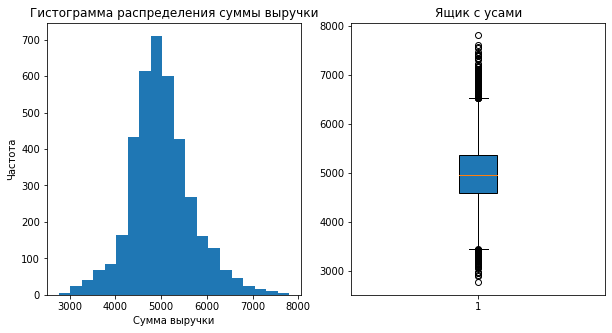

In [52]:
visual_hist_box(market_money['выручка'], 'Гистограмма распределения суммы выручки', 'Сумма выручки')

В столбце все равно остались выбросы, при этом распределение - нормальное.

In [53]:
market_time.describe()

,минут
count,2600.000000
mean,13.336154
std,4.080198
min,4.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,23.000000


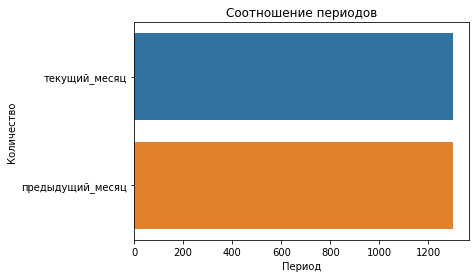

In [54]:
visual_countplot(market_time['период_время'], 'Соотношение периодов', 'Период')

По каждому клиенту есть информация по двум периодам.

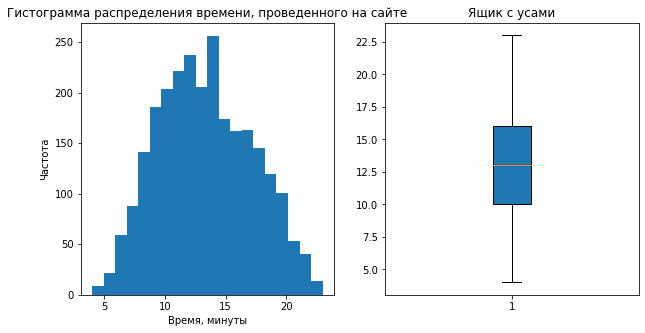

In [55]:
visual_hist_box(market_time['минут'], 'Гистограмма распределения времени, проведенного на сайте', 'Время, минуты')

Выбросы отсутствуют. Распределение похоже на нормальное.

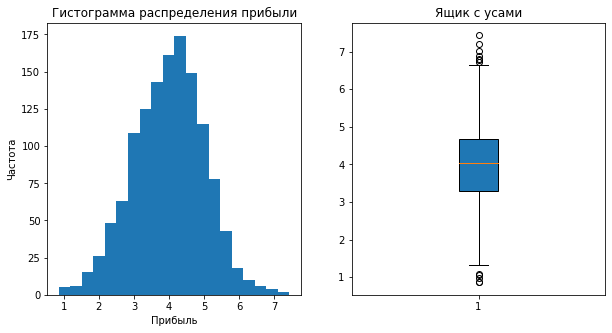

In [56]:
visual_hist_box(money['прибыль'], 'Гистограмма распределения прибыли', 'Прибыль')

Присутствуют выбросы. Распределение - нормальное.

###### Вывод по исследовательскому анализу данных: 
 - в данных присутствуют выбросы;
 - наблюдается дисбаланс классов.
 
Приступим к объединению таблиц.

## Объединение таблиц

Перед объединением датасетов развернем их.

In [57]:
market_time_pivot = pd.pivot_table(market_time, index=market_time.index, columns='период_время')

In [58]:
market_time_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   (минут, предыдущий_месяц)  1300 non-null   int64
 1   (минут, текущий_месяц)     1300 non-null   int64
dtypes: int64(2)
memory usage: 30.5 KB


In [59]:
market_time_pivot.columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц']

In [60]:
market_time_pivot.head()

,минут_предыдущий_месяц,минут_текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11


In [61]:
market_time_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   минут_предыдущий_месяц  1300 non-null   int64
 1   минут_текущий_месяц     1300 non-null   int64
dtypes: int64(2)
memory usage: 30.5 KB


In [62]:
market_money_pivot = pd.pivot_table(market_money, index=market_money.index, columns='период_деньги')

In [63]:
market_money_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   (выручка, предыдущий_месяц)     1297 non-null   float64
 1   (выручка, препредыдущий_месяц)  1297 non-null   float64
 2   (выручка, текущий_месяц)        1299 non-null   float64
dtypes: float64(3)
memory usage: 40.6 KB


In [64]:
market_money_pivot.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']

In [65]:
market_money_pivot.head()

,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
id,,,
215348,NaN,NaN,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5


Пропуски означают, что клиенты ничего не покупали в указанный период. Заполним их нулями.

In [66]:
market_money_pivot = market_money_pivot.fillna(0)

In [67]:
market_money_pivot.head()

,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
id,,,
215348,0.0,0.0,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5


In [68]:
market_money_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   выручка_предыдущий_месяц     1300 non-null   float64
 1   выручка_препредыдущий_месяц  1300 non-null   float64
 2   выручка_текущий_месяц        1300 non-null   float64
dtypes: float64(3)
memory usage: 40.6 KB


Объединим датасеты.

In [69]:
df_full = market_file.join(market_money_pivot, on='id')
df_full = df_full.join(market_time_pivot, on='id')

Оставим только активных клиентов.

In [70]:
df_full = df_full[(df_full['выручка_предыдущий_месяц'] > 0) & (df_full['выручка_препредыдущий_месяц'] > 0) & (df_full['выручка_текущий_месяц'] > 0)]

In [71]:
check_df(df_full)

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   object 
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   акционные_покупки                    1296 non-null   float64
 7   популярная_категория                 1296 non-null   object 
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  ошибка_сервиса                       1296 non-null   int64  
 11  страниц_за_визит       

None

покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  0
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64

11

Мы удалили 4 наблюдения о неактивных пользователях.

Мы успешно объединили таблицы.

Приступим к корреляционному анализу.

## Использование пайплайнов

В качестве целевого признака будем использовать покупательскую активность.

В качестве метрики будем использовать ROC-AUC, так как данная метрика позволяет оценить качество бинарной классификации при всех возможных порогах классификации.

In [72]:
df_full.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [73]:
X = df_full.drop(['покупательская_активность'], axis=1)
y = df_full['покупательская_активность']
label_mapping = {'Снизилась': 1, 'Прежний уровень': 0}
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.map(label_mapping)) 

In [74]:
TEST_SIZE = 0.25
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

In [75]:
ohe_columns = ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
               'акционные_покупки', 'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
               'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц',
               'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']

In [76]:
%%time
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))
    ]
    )
 
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)
#('ohe', ohe_pipe, ['популярная_категория'])
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', MinMaxScaler(), num_columns)
    ],
    remainder='passthrough'
)
 
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])
 
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(6, 20),
        'models__max_features': range(6, 20)
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 20)
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': range(1, 20)
    },
    {
        'models': [SVC(probability=True)],
        'models__kernel': ['linear', 'rbf']
    },
    {
    'preprocessor_num': [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler(), 
        'passthrough'
    ]   
}
]
 
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)
 
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на кроссвалидацинной выборке:', randomized_search.best_score_)
 
y_test_pred_proba = randomized_search.predict_proba(X_test)[:,1]
 
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred_proba)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('num', MinMaxScaler(),
                                                  ['маркет_актив_6_мес',
                                                   'маркет_актив_тек_мес',
           

Наилучшая модель - метод К-ближайших соседов с гиперпараметром n_neighbors=6.

Проанализируем важность признаков.

## Сегментация покупателей

Установим порог сегментации 0.9, чтобы выделить клиентов, у которых, по предсказанию модели, наивысшие шансы снижения покупательской активности.

In [80]:
predictions = (randomized_search.best_estimator_.predict_proba(X)[:, 1] > 0.9)
predictions = ['Снизилась' if x == True else 'Не снизилась' for x in predictions]

In [81]:
len(predictions)

1296

In [82]:
#threshold = 0.9

#predictions = best_model.predict_proba(X)[:, 1]
#prediction_flags = np.where(predictions > threshold, True, False)

In [83]:
#df_decline = df_full.loc[prediction_flags]

In [84]:
df_model = df_full.copy(deep=True)

In [85]:
df_model['прогноз_модели'] = predictions

In [86]:
df_model.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,прогноз_модели
id,,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,Снизилась
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,Не снизилась
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,Не снизилась
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,Не снизилась
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,Не снизилась


Добавим данные о прибыльности покупателей.

In [87]:
df_model = df_model.join(money, on='id')

df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   object 
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   акционные_покупки                    1296 non-null   float64
 7   популярная_категория                 1296 non-null   object 
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  ошибка_сервиса                       1296 non-null   int64  
 11  страниц_за_визит       

In [88]:
df_model.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,прогноз_модели,прибыль
id,,,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,Снизилась,4.16
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,Не снизилась,3.13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,Не снизилась,4.87
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,Не снизилась,4.21
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,Не снизилась,3.95


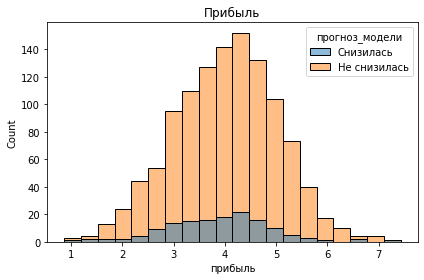

In [89]:
sns.histplot(data=df_model, x='прибыль', hue='прогноз_модели', bins=20)
plt.title('Прибыль')

plt.tight_layout()
plt.show()

In [90]:
df_model['прибыль'].describe()

count    1296.000000
mean        3.997701
std         1.011198
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

Среднее значение прибыли практически равно 4. Для дальнейшего анализа будем использовать группу пользователей со значением прибыли, выше среднего. Это наиболее выгодные клиенты для бизнеса и именно их есть смысл удержать.

In [91]:
df_most_profit = df_model[df_model['прибыль'] >= 4]

In [92]:
len(df_most_profit)

671

Построим графики по данному датасету. Интерисующие нас столбцы - самые важные признаки для обученной модели.

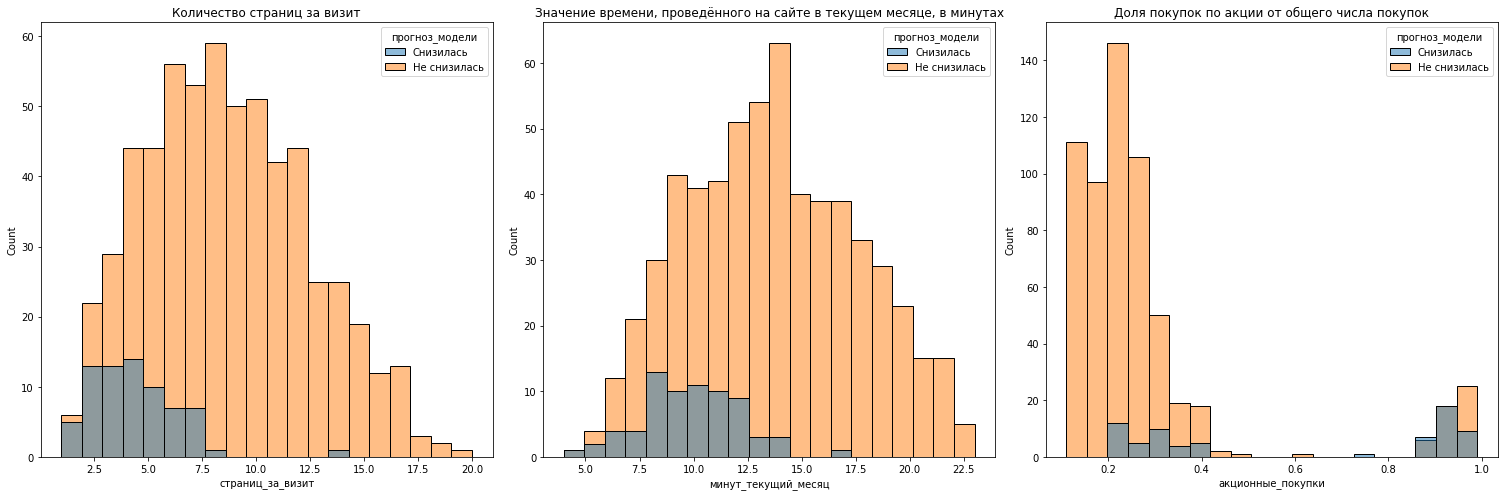

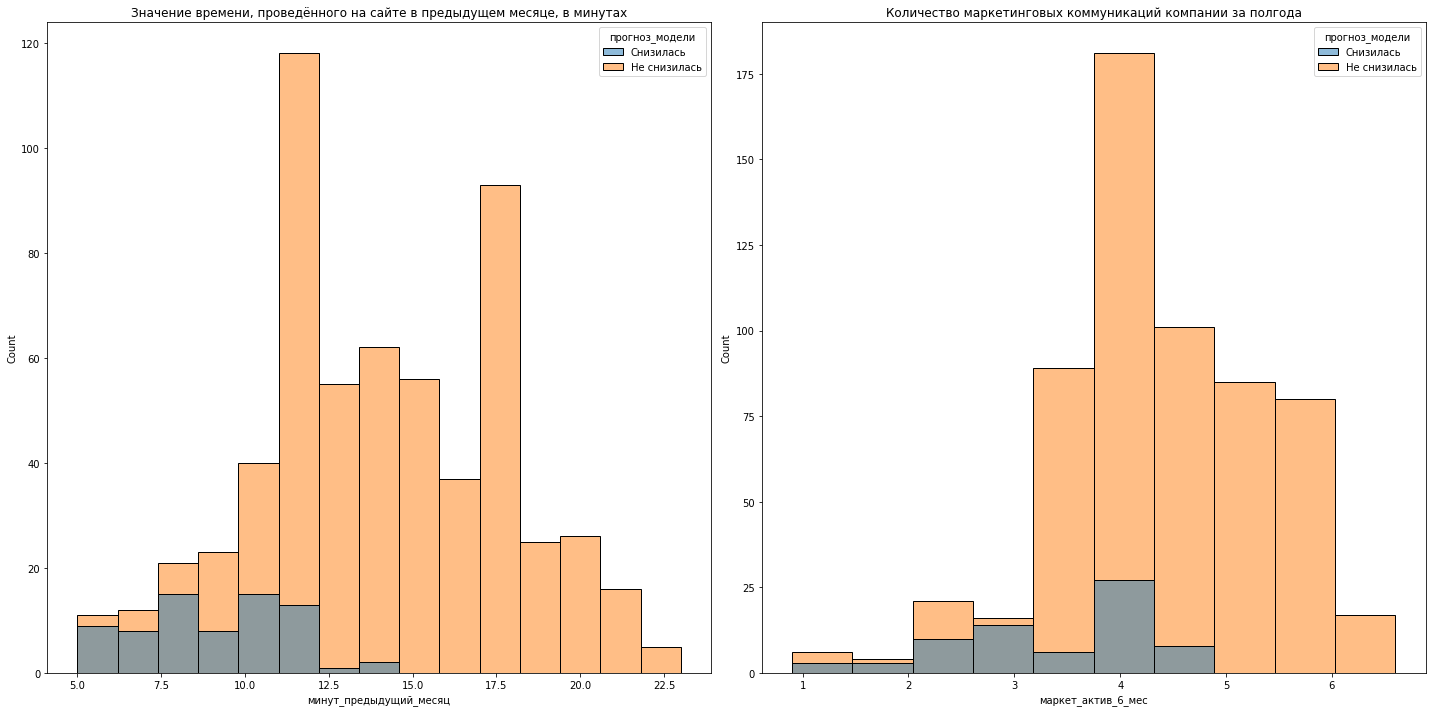

In [93]:
plt.figure(figsize=(21, 7))

plt.subplot(1, 3, 1)
sns.histplot(data=df_most_profit, x='страниц_за_визит', hue='прогноз_модели', bins=20)
plt.title('Количество страниц за визит')

plt.subplot(1, 3, 2)
sns.histplot(data=df_most_profit, x='минут_текущий_месяц', hue='прогноз_модели', bins=20)
plt.title('Значение времени, проведённого на сайте в текущем месяце, в минутах')

plt.subplot(1, 3, 3)
sns.histplot(data=df_most_profit, x='акционные_покупки', hue='прогноз_модели', bins=20)
plt.title('Доля покупок по акции от общего числа покупок')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.histplot(data=df_most_profit, x='минут_предыдущий_месяц', hue='прогноз_модели', bins=15)
plt.title('Значение времени, проведённого на сайте в предыдущем месяце, в минутах')

plt.subplot(1, 2, 2)
sns.histplot(data=df_most_profit, x='маркет_актив_6_мес', hue='прогноз_модели', bins=10)
plt.title('Количество маркетинговых коммуникаций компании за полгода')

plt.tight_layout()
plt.show()

In [94]:
df_most_profit.groupby(by='прогноз_модели')['страниц_за_визит'].describe()

,count,mean,std,min,25%,50%,75%,max
прогноз_модели,,,,,,,,
Не снизилась,600.0,8.578333,3.937389,1.0,6.0,8.0,11.0,20.0
Снизилась,71.0,4.070423,2.160185,1.0,2.5,4.0,5.0,14.0


Среднее количество просмотренных страниц у пользователей, у которых ожидается падение покупательской активности, - 4.1, в то время как среднее значение у остальных пользователей - 9.3. Снижение числа просмотренных страниц, может являться поводом для снижение активности покупателя. Возможное решение - удержание клиента на сайте путем введения/улучшения рекомендательных систем. Есть шанс, что увеличение просмотренных страниц положительно скажется на активности клиента.

In [95]:
df_most_profit.groupby(by='прогноз_модели')['минут_текущий_месяц'].describe()

,count,mean,std,min,25%,50%,75%,max
прогноз_модели,,,,,,,,
Не снизилась,600.0,13.650000,4.151251,4.0,10.0,14.0,17.0,23.0
Снизилась,71.0,9.661972,2.419821,4.0,8.0,10.0,11.0,17.0


Среднее значение времени, проведенного на сайте в текущем месяце, у пользователей, у которых ожидается падение покупательской активности, - 9.7, в то время как среднее значение у остальных пользователей - 14.2. Рекомендации - как по количеству просмотренных страниц.

In [96]:
df_most_profit.groupby(by='прогноз_модели')['минут_предыдущий_месяц'].describe()

,count,mean,std,min,25%,50%,75%,max
прогноз_модели,,,,,,,,
Не снизилась,600.0,13.931667,3.699072,5.0,11.0,14.0,17.0,23.0
Снизилась,71.0,9.028169,2.104226,5.0,8.0,9.0,10.0,14.0


Среднее значение времени, проведенного на сайте в текущем месяце, у пользователей, у которых ожидается падение покупательской активности, - 9.7, в то время как среднее значение у остальных пользователей - 14.5. Рекомендации - как по количеству просмотренных страниц.

In [97]:
df_most_profit.groupby(by='прогноз_модели')['акционные_покупки'].describe()

,count,mean,std,min,25%,50%,75%,max
прогноз_модели,,,,,,,,
Не снизилась,600.0,0.282483,0.210669,0.11,0.170,0.24,0.28,0.99
Снизилась,71.0,0.608592,0.327651,0.21,0.295,0.40,0.94,0.99


Средняя доля покупок акционных товаров у пользователей, у которых ожидается падение покупательской активности, - 47%, в то время как среднее значение у остальных пользователей - 27%. Эти пользователи чаще остальных покупают товары по акциям. Возможно, если мы хотим увеличить активность этих покупателей, необходимо делать этим клиентам персональные спецпредложения.

In [98]:
df_most_profit.groupby(by='прогноз_модели')['маркет_актив_6_мес'].describe()

,count,mean,std,min,25%,50%,75%,max
прогноз_модели,,,,,,,,
Не снизилась,600.0,4.345333,0.951466,0.9,3.8,4.3,5.0,6.6
Снизилась,71.0,3.347887,0.946552,0.9,2.7,3.5,4.1,4.8


Среднее количество маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев, у пользователей, у которых ожидается падение покупательской активности, - 3.2, в то время как среднее значение у остальных пользователей - 4.5. Возможно, необходимо увеличить количество рекламных рассылок для данной группы пользователей.

## Общий вывод

Проект проводился по заказу интернет-магазина "В один клик". Требовалось разработать модель машинного обучения, которая позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

На этапе предобработки данных были проделаны следующие шаги:
 - названия столбцов приведены к общему виду;
 - исправлены опечатки в данных;
 - данные проверены на наличие пропусков и дубликатов.
 
В ходе исследовательского анализа данных было обнаружено:
 - в данных присутствуют выбросы;
 - наблюдается дисбаланс классов.
 
Данные (кроме прибыли) были объединены в единный датасет. Были удалены 4 наблюдения неактивных клиентов.

В ходе корреляционного анализа было обнаружено, что мультиколлинеарность отсутствует.

Был создан пайплайн для нахождения наилучшей модели машинного обучения. По итогам обучения было обнаружено, что наилучшая модель - дерево решений с гиперпараметрами max_depth=5 и max_features=5.

По итогам построение графика важности признаков с помощью метода SHAP было обнаружено:

Наиболее важные признаки для модели:
 - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца;
 - значение времени, проведённого на сайте в текущем месяце, в минутах;
 - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев;
 - значение времени, проведённого на сайте в предыдущем месяце, в минутах;
 - количество маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев.
 
Такие признаки, как: популярные категории и уровень сервиса никак не влияют на модель.
 
Для сегментации покупателей был выбран порог 0.9 для наиболее точного определения уходящих клиентов. Также были отобраны только клиенты с прибылью выше среднего, так как они представляют наибольший интерес для бизнеса. Было обнаружено:
 - среднее количество просмотренных страниц у пользователей, у которых ожидается падение покупательской активности, ниже среднего значения пользователей, у которых прогнозируется сохранение уровня покупательской активности. Предлагаемое решение - удержание клиентов на сайте путем введения/улучшения рекомендательных систем;
 - среднее значение времени, проведенного на сайте в текущем и предыдущем месяцах, у пользователей, у которых ожидается падение покупательской активности, ниже среднего значения пользователей, у которых прогнозируется сохранение уровня покупательской активности. Предлагаемое решение - удержание клиентов на сайте путем введения/улучшения рекомендательных систем;
 - средняя доля покупок акционных товаров у пользователей, у которых ожидается падение покупательской активности, выше среднего значения пользователей, у которых прогнозируется сохранение уровня покупательской активности. Предлагаемое решение - делать этим клиентам персональные спецпредложения;
 - среднее количество маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев у пользователей, у которых ожидается падение покупательской активности ниже среднего значения пользователей, у которых прогнозируется сохранение уровня покупательской активности. Предлагаемое решение -  увеличить количество рекламных рассылок для данной группы пользователей